In [2]:
import pandas
from pandas import DataFrame

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

import keras
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [3]:
train_data_main = pandas.read_csv('./train.csv', delimiter=';', low_memory=False)
test_data_main = pandas.read_csv('./test.csv', delimiter=';', low_memory=False)

In [4]:
train_data_main.columns

Index(['Unnamed: 0', 'date', 'Людський.випадок...Інд..',
       'Дата.реєстрації.випадку', 'Класифікація.випадку', 'Область', 'Район',
       'Місто.село', 'Стать',
       'Вік..повних.років..на.момент.реєстрації.випадку', 'Дата.народження',
       'Наявність.супутніх.станів', 'Вагітність', 'Імунодефіцити..в.т..ч..ВІЛ',
       'Серцево.судинні.захворювання..в.т..ч..гіпертензія', 'Діабет',
       'Захворювання.печінки', 'Захворювання.нирок',
       'Хронічні.неврологічні.чи.нейром.язові.захворювання',
       'Злоякісні.новоутворення', 'Хронічні.захворювання.легень',
       'Інше..зазначте',
       'Назва.закладу.який.виявив.підозру..направив.058.форму.',
       'Самоізоляція', 'Госпіталізація', 'Дата.госпіталізації',
       'Місце.госпіталізації', 'Перебування.у.відділенні.інтенсивної.терапії',
       'Штучна.вентиляція.легень', 'Пацієнт.медичний.працівник',
       'Назва.місця.роботи.медичного.працівника', 'Результат.захворювання',
       'Дата.припинення.ізоляції...виписки', 'Дата.сме

In [5]:
test_data_main

,Unnamed: 0,date,Людський.випадок...Інд..,Дата.реєстрації.випадку,Класифікація.випадку,Область,Район,Місто.село,Стать,Вік..повних.років..на.момент.реєстрації.випадку,...,Інше..зазначте,Назва.закладу.який.виявив.підозру..направив.058.форму.,Самоізоляція,Госпіталізація,Дата.госпіталізації,Місце.госпіталізації,Перебування.у.відділенні.інтенсивної.терапії,Штучна.вентиляція.легень,Пацієнт.медичний.працівник,Назва.місця.роботи.медичного.працівника
0,450347,02/11/2020,HWEB0020-LQ8GM,2020-10-22,Підтверджений,Волинська,Луцьк,Луцьк,Жіноча,67,...,NaN,"КП ""Луцький центр первинної медичної допомоги №2""",NaN,Так,2020-10-05,"КП ""Волинська обласна інфекційна лікарня""",NaN,NaN,Так,"КП ""Волинський обласний медичний центр онкології"""
1,50880,02/11/2020,HWEB0020GSCT,2020-10-16,Підтверджений,Хмельницька,Нетішин,Нетішин,Жіноча,58,...,шлунково-кишкового тракту,"КНП НЕТІШИНСЬКОЇ МІСЬКОЇ РАДИ ""Центр первинної...",Так,Ні,NaN,NaN,NaN,NaN,Ні,NaN
2,186035,02/11/2020,HWEB0020GUX6,2020-10-17,Підтверджений,Полтавська,Лохвицький,Заводське,Чоловіча,82,...,NaN,КНП Лохвицька районна лікарня Лохвицької район...,Ні,Так,2020-10-16,КНП Лохвицька РЛ Лохвицької районної ради,Так,Ні,Ні,NaN
3,48373,02/11/2020,HWEB0020-M3XIR,2020-10-23,Підтверджений,Хмельницька,Нетішин,Нетішин,Жіноча,36,...,NaN,"КНП НЕТІШИНСЬКОЇ МІСЬКОЇ РАДИ ""Центр первинної...",Так,Ні,NaN,NaN,NaN,NaN,Ні,NaN
4,288084,02/11/2020,HWEB0020FX1M,2020-10-06,Підтверджений,Київська міська рада,Київська міська рада,Київ-Деснянський,Чоловіча,64,...,NaN,"КНП ""Центр первинної медико-санітарної допомог...",Так,Ні,NaN,NaN,Ні,Ні,Ні,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,410247,02/11/2020,HWEB0020EGDV,2020-10-08,Підтверджений,Житомирська,Чуднівський,Чуднів,Жіноча,57,...,NaN,"КНП ""Чуднівський центр первинної медико-саніта...",NaN,Ні,NaN,NaN,NaN,NaN,NaN,NaN
996,141683,02/11/2020,HWEB0020G62V,2020-10-11,Підтверджений,Сумська,Липоводолинський,Суха Грунь,Чоловіча,63,...,NaN,"КНП ЛИПОВОДОЛИНСЬКОЇ РАЙОННОЇ РАДИ ""Липоводоли...",Так,Ні,NaN,NaN,NaN,NaN,Ні,NaN
997,154742,02/11/2020,HWEB0020GXKJ,2020-10-15,Підтверджений,Рівненська,Кузнецовська міська рада,Вараш,Жіноча,62,...,NaN,"КНП ВАРАСЬКОЇ МІСЬКОЇ РАДИ ""Вараський центр пе...",Так,Ні,NaN,NaN,Ні,Ні,Ні,NaN
998,450697,02/11/2020,HWEB0020HAUH,2020-10-20,Підтверджений,Волинська,Любешівський,Підкормілля,Жіноча,49,...,NaN,"КНП ""Центр первинної медико-санітарної допомог...",Так,Ні,NaN,NaN,NaN,NaN,Так,"КНП ""любешівська ЦРЛ"""


In [173]:
ID = 'Unnamed: 0'
DATE = 'date'
HUMAN_CASE_INDEX = 'Людський.випадок...Інд..'
DATE_OF_REGISTRATION = 'Дата.реєстрації.випадку'
CASE_CLASSIFICATION = 'Класифікація.випадку'
DISTRICT = 'Область'
REGION = 'Район'
CITY = 'Місто.село'
SEX = 'Стать'
AGE = 'Вік..повних.років..на.момент.реєстрації.випадку'
DATE_OF_BIRTH = 'Дата.народження'
PRESENCE_OF_CONCOMITANT_CONDITIONS = 'Наявність.супутніх.станів'
PREGNANCY = 'Вагітність'
HIV_AIDS = 'Імунодефіцити..в.т..ч..ВІЛ'
HEART_DISEASES = 'Серцево.судинні.захворювання..в.т..ч..гіпертензія'
DIABETES = 'Діабет'
LIVER_DISEASES = 'Захворювання.печінки'
KIDNEY_DISEASES = 'Захворювання.нирок'
NEURO_MUSCLE_DISEASES = 'Хронічні.неврологічні.чи.нейром.язові.захворювання'
CANCER = 'Злоякісні.новоутворення'
LUNGS_DISEASES = 'Хронічні.захворювання.легень'
OTHER_DISEASES = 'Інше..зазначте'
HOSPITAL_THAT_FOUND = 'Назва.закладу.який.виявив.підозру..направив.058.форму.'
SELF_ISOLATION = 'Самоізоляція'
HOSPITALIZATION = 'Госпіталізація'
HOSPITALIZATION_DATE = 'Дата.госпіталізації'
HOSPITALIZATION_PLACE = 'Місце.госпіталізації'
INTESIVE_THERAPY = 'Перебування.у.відділенні.інтенсивної.терапії'
LUNGS_VENTILATION = 'Штучна.вентиляція.легень'
IS_MEDIC = 'Пацієнт.медичний.працівник'
MEDIC_WORK_PLACE = 'Назва.місця.роботи.медичного.працівника'
DISEASE_RESULT = 'Результат.захворювання'
DATE_END_SELF_ISOLATION = 'Дата.припинення.ізоляції...виписки'
DATE_OF_DEATH = 'Дата.смерті'
DATE_IN_HUMAN_CASE = 'Людський.випадок...Дата.введення'
DATE_TEST_RESULT = 'Дата.лабораторного.підтвердження.або.дата.негативного.тесту'
TEST_RESULT = 'Результат.лабораторного.тесту'
DATE_DISPOSAL = 'Останній.негативний.Лабораторія.або.дата.виписки'

IS_NEW_SICK = 'Захворілий'
DAYS_SICKNESS = 'тривалість хвороби'
IS_BIG_CITY = 'Чи центр області'
HAS_OTHER_DISEASES = 'Має інші хвороби'
DAYS_BEFORE_HOSPITALIZATION = 'кількість днів перед госпіталізацією'

ALL_COLUMNS = {
    ID, DATE, HUMAN_CASE_INDEX, DATE_OF_REGISTRATION, CASE_CLASSIFICATION, DISTRICT, REGION, CITY, SEX, AGE, DATE_OF_BIRTH, PRESENCE_OF_CONCOMITANT_CONDITIONS, PREGNANCY,
    HIV_AIDS, HEART_DISEASES, DIABETES, LIVER_DISEASES, KIDNEY_DISEASES, NEURO_MUSCLE_DISEASES, CANCER, LUNGS_DISEASES, OTHER_DISEASES, HOSPITAL_THAT_FOUND, SELF_ISOLATION,
    HOSPITALIZATION, HOSPITALIZATION_DATE, HOSPITALIZATION_PLACE, INTESIVE_THERAPY, LUNGS_VENTILATION, IS_MEDIC, MEDIC_WORK_PLACE, DISEASE_RESULT, DATE_END_SELF_ISOLATION,
    DATE_OF_DEATH, DATE_IN_HUMAN_CASE, DATE_TEST_RESULT, TEST_RESULT, DATE_DISPOSAL
}
CUSTOM_COLUMNS ={
    IS_NEW_SICK, DAYS_SICKNESS, IS_BIG_CITY, HAS_OTHER_DISEASES, DAYS_BEFORE_HOSPITALIZATION
}

BOOLEAN_COLUMNS = {
    PRESENCE_OF_CONCOMITANT_CONDITIONS, PREGNANCY, HEART_DISEASES, DIABETES, LIVER_DISEASES, KIDNEY_DISEASES, NEURO_MUSCLE_DISEASES, CANCER, LUNGS_DISEASES, SELF_ISOLATION,
    HOSPITALIZATION, INTESIVE_THERAPY, LUNGS_VENTILATION, IS_MEDIC
}
DATE_COLUMNS = {
    DATE, DATE_OF_REGISTRATION, DATE_OF_BIRTH, HOSPITALIZATION_DATE, DATE_END_SELF_ISOLATION, DATE_OF_DEATH, DATE_IN_HUMAN_CASE, DATE_TEST_RESULT, DATE_DISPOSAL
}

## Частина перша. Описовий аналіз даних
Завдання.
1. Описати кожну колонку, привести дані до відповідного типу, визначити наявність відхилень, помилок та відсутніх даних. Здійснити очистку даних.
2. Агрегувати по областях та побудувати стопчикову діаграму для захворівших, одужавших і померлих.
3. Побудувати графіки залежності кількості захворівших по топ10 областях України помісячно.
4. Побудувати віковий розподіл захворівших по всій Україні для кожного кварталу 2020 року. Порівняти та зробити висновки.
5. Оцінити гендерний склад захворівших, одужавших і померлих.
6. Визначити відсоток з додатковими хворобами та порахувати їх смертність окремо від інших.
8. Вивести топ10 лікарень та міст з найвищою абсолютною смертністю
9. Обчислити графік захворівших, одужавших і померлих для лікарів. Чи вірна гіпотеза, що смертність серед лікарів вища?

In [177]:
class InitialPrepareData:
    def __init__(self, data, is_test=False, include_result=True):
        self.data: DataFrame = data.copy(deep=True)
        self.is_test = is_test
        self.include_result = include_result

    def find_absent_data(self):
        if self.is_test:
            columns = ALL_COLUMNS.difference({ID, DATE_END_SELF_ISOLATION, DATE_TEST_RESULT, TEST_RESULT, DATE_DISPOSAL, DATE_IN_HUMAN_CASE, DATE_OF_DEATH})
        else:
            columns = ALL_COLUMNS.difference({ID})
        if not self.include_result:
            columns = columns.difference({DISEASE_RESULT,})
        print(columns)
        empty_rows = self.data[self.data[columns].isnull().all(axis=1)]
        print('count of empty rows: ', len(empty_rows))
        self.data = self.data.drop(empty_rows.index)
        return self.data

    def convert_columns_to_boolean(self):
        for bool_col in BOOLEAN_COLUMNS:
            self.data[bool_col] = self.data[bool_col].replace({'Невідомо': np.NAN, 'Так': True, 'Ні': False})
            #print(bool_col, self.data[bool_col].unique())
        return self.data

    def convert_columns_to_date(self, cols=None):
        cols = cols or DATE_COLUMNS
        for col in cols:
            self.data[col] = pandas.to_datetime(self.data[col], errors='coerce')
            print(self.data[col].dtype)
        #self.data[DATE_COLUMNS] = self.data[DATE_COLUMNS].apply(pandas.to_datetime)
        return self.data

    def clean_disease_result(self):
        self.data[DISEASE_RESULT] = self.data[DISEASE_RESULT].replace({'Невідомо': np.NAN})
        return self.data

    def clean_test_result(self):
        self.data[TEST_RESULT] = self.data[TEST_RESULT].replace({'позитивний': 'Позитивний', 'негативний': 'Негативний', np.NAN: 'Невідомо'})
        return self.data

    def clean_date_disposal(self):
        self.data.loc[self.data[DATE_DISPOSAL] == pandas.Timestamp(year=1899, month=12, day=30), DATE_DISPOSAL] = np.NAN

    def append_is_new_sick(self):
        def assign_new_sick(args):
            test_result, disease_result = args
            a =  test_result=='Позитивний' and disease_result!='Не одужав (продовжує хворіти)'
            return a
        self.data[IS_NEW_SICK] = self.data[[TEST_RESULT, DISEASE_RESULT]].apply(assign_new_sick, axis=1)

    def append_days_sickness(self):
        def assign_days_sickness(args):
            test_result, date_start, date_end = args
            if test_result != 'Позитивний' or pandas.isnull(date_end) or pandas.isnull(date_start):
                return np.NAN
            days = (date_end - date_start) / np.timedelta64(1, 'D')
            if days < 0:
                return 0
            return days
        self.data[DAYS_SICKNESS] = self.data[[TEST_RESULT, DATE_OF_REGISTRATION, DATE_DISPOSAL]].apply(assign_days_sickness, axis=1)

    def append_days_before_hospitalization(self):
        def assign_days_before_hospitalization(args):
            date_start, date_end = args
            if pandas.isnull(date_end) or pandas.isnull(date_start):
                return 0
            days = (date_end - date_start) / np.timedelta64(1, 'D')
            if days < 0:
                return 0
            return days
        self.convert_columns_to_date([DATE_OF_REGISTRATION, HOSPITALIZATION_DATE])
        self.data[DAYS_BEFORE_HOSPITALIZATION] = self.data[[DATE_OF_REGISTRATION, HOSPITALIZATION_DATE]].apply(assign_days_before_hospitalization, axis=1)


    def append_is_big_city(self):
        district_centers = [
            'Львів',
            'Київ',
            'Одеса',
            'Чернівці',
            'Харків',
            'Ужгород',
            'Вінниця',
            'Донецьк',
            'Тернопіль',
            'Запоріжжя',
            'Івано-Франківськ',
            'Полтава',
            'Чернігів',
            'Черкаси',
            'Суми',
            'Луцьк',
            'Миколаїв',
            'Дніпро',
            'Кропивницький',
            'Луганськ',
            'Рівне',
            'Хмельницький',
            'Сімферополь',
            'Житомир',
            'Херсон',
        ]
        def assign_is_big_city(city):
            return city.isin(district_centers)
        self.data[IS_BIG_CITY] = self.data[[CITY]].apply(assign_is_big_city, axis=1)

    def append_has_other_diseases(self):
        self.data[HAS_OTHER_DISEASES] = self.data[[OTHER_DISEASES]].apply(lambda other_d: other_d.notna())


    def prepare(self):
        self.find_absent_data()
        self.convert_columns_to_boolean()
        if not self.is_test:
            self.clean_test_result()
            self.convert_columns_to_date()
            self.clean_date_disposal()
            self.append_is_new_sick()
            self.append_days_sickness()
        self.append_is_big_city()
        self.append_has_other_diseases()
        self.append_days_before_hospitalization()
        return self.data


In [317]:
prep = InitialPrepareData(train_data_main, is_test=False, include_result=True)
cleaned_data = prep.prepare()

{'Район', 'Дата.припинення.ізоляції...виписки', 'Дата.госпіталізації', 'Пацієнт.медичний.працівник', 'Наявність.супутніх.станів', 'Вагітність', 'Місце.госпіталізації', 'Результат.лабораторного.тесту', 'Результат.захворювання', 'Вік..повних.років..на.момент.реєстрації.випадку', 'Дата.реєстрації.випадку', 'date', 'Дата.смерті', 'Хронічні.неврологічні.чи.нейром.язові.захворювання', 'Штучна.вентиляція.легень', 'Серцево.судинні.захворювання..в.т..ч..гіпертензія', 'Злоякісні.новоутворення', 'Самоізоляція', 'Останній.негативний.Лабораторія.або.дата.виписки', 'Дата.народження', 'Перебування.у.відділенні.інтенсивної.терапії', 'Місто.село', 'Область', 'Стать', 'Людський.випадок...Дата.введення', 'Людський.випадок...Інд..', 'Імунодефіцити..в.т..ч..ВІЛ', 'Інше..зазначте', 'Захворювання.нирок', 'Класифікація.випадку', 'Назва.місця.роботи.медичного.працівника', 'Дата.лабораторного.підтвердження.або.дата.негативного.тесту', 'Назва.закладу.який.виявив.підозру..направив.058.форму.', 'Хронічні.захворюва

In [318]:
class AnalyzeDataset:
    def __init__(self, data):
        self.data: DataFrame = data.copy(deep=True)

    def draw_histogram(self, y_label, x_labels, bar_types, width=0.3, **kwargs):
        figsize = kwargs.get('figsize') or (15, 10)
        fig, ax = plt.subplots(figsize = figsize)
        n = len(x_labels)
        ind = np.arange(n)
        bars = [
            ax.bar(ind+i*width, bar_type.get('data'), width, color=bar_type.get('color'), label=bar_type.get('bar_name'))
            for i, bar_type in zip(range(n), bar_types)
        ]

        ax.set_ylabel(y_label)
        ax.set_xticks(ind+width*2)
        ax.set_xticklabels(x_labels)
        ax.legend()

        for bar in bars:
            ax.bar_label(bar, padding=3)

        fig.tight_layout()
        plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='large')
        plt.show()

    def draw_plot_stats(self, by_column, **kwargs):
        unique_column_values = self.data[by_column].unique()
        cases_count = 'Кількість випадків'
        recovered_count = 'Кількість одужавших'
        deaths_count = 'Кількість померлих'
        all_data = DataFrame(columns=[by_column, cases_count, recovered_count, deaths_count])
        for column_value in unique_column_values:
            column_cases = self.data[self.data[by_column]==column_value]
            cases = len(column_cases[column_cases[IS_NEW_SICK]==True])
            recovered = len(column_cases[column_cases[DISEASE_RESULT]=='Одужання'])
            deaths = len(column_cases[column_cases[DISEASE_RESULT] == 'Пацієнт помер'])
            all_data = all_data.append({column_value: column_value, cases_count: cases, recovered_count: recovered, deaths_count: deaths}, ignore_index=True)
        bar_types = [
            {
                'bar_name': cases_count,
                'color': 'b',
                'data': all_data[cases_count].to_numpy()
            },
            {
                'bar_name': recovered_count,
                'color': 'g',
                'data': all_data[recovered_count].to_numpy()
            },
            {
                'bar_name': deaths_count,
                'color': 'r',
                'data': all_data[deaths_count].to_numpy()
            },
        ]
        return self.draw_histogram('Кількість', unique_column_values, bar_types, **kwargs)


    def draw_plot_stats_by_district(self):
        self.draw_plot_stats(DISTRICT, figsize=(40,20))


    def draw_plot_cases_by_month(self):
        top_districts = [
            'Київська міська рада',
            'Львівська',
            'Харківська',
            'Івано-Франківська',
            'Одеська',
            'Тернопільська',
            'Рівненська',
            'Чернівецька',
            'Закарпатська',
            'Київська',
        ]
        filtered = self.data[(self.data[DISTRICT].isin(top_districts)) & (self.data[IS_NEW_SICK]==True)]
        grouped = filtered.groupby(pandas.Grouper(key=DATE_OF_REGISTRATION, freq='M'))[ID].count().plot()
        return grouped

    def draw_plot_distribution_by_age(self):
        filtered = self.data[self.data[IS_NEW_SICK]==True]
        quarters = ['2020Q1', '2020Q2', '2020Q3', '2020Q4']
        for q in quarters:
            dat = filtered[filtered[DATE_OF_REGISTRATION].dt.to_period('Q') == q][AGE].dropna()
            plot = sns.displot(dat, bins=10, color="c")
            plot.fig.suptitle(q, fontsize=16)
        print('З кожним кварталом вік захворюванності зменшується')

    def draw_plot_stats_by_gender(self):
        self.draw_plot_stats(SEX, figsize=(8,5))


    def draw_plot_stats_by_is_medic(self):
        self.draw_plot_stats(IS_MEDIC, figsize=(8,5))


anal = AnalyzeDataset(cleaned_data)


З кожним кварталом вік захворюванності зменшується


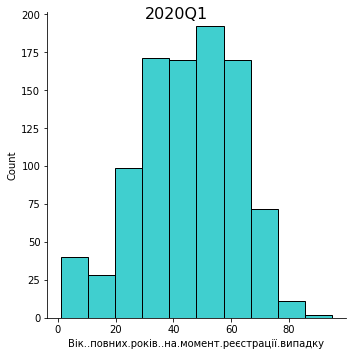

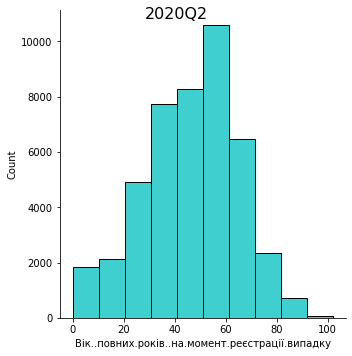

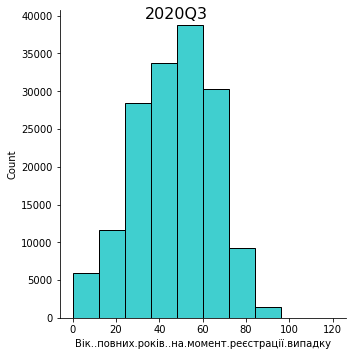

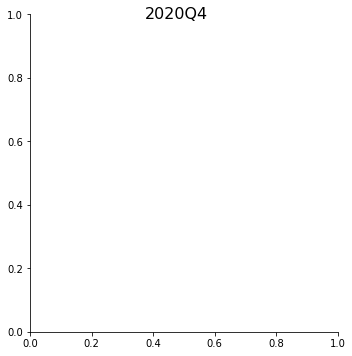

In [319]:
anal.draw_plot_distribution_by_age()

<AxesSubplot:xlabel='Дата.реєстрації.випадку'>

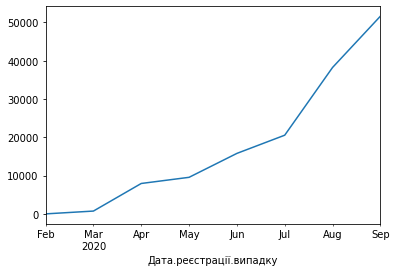

In [320]:
anal.draw_plot_cases_by_month()


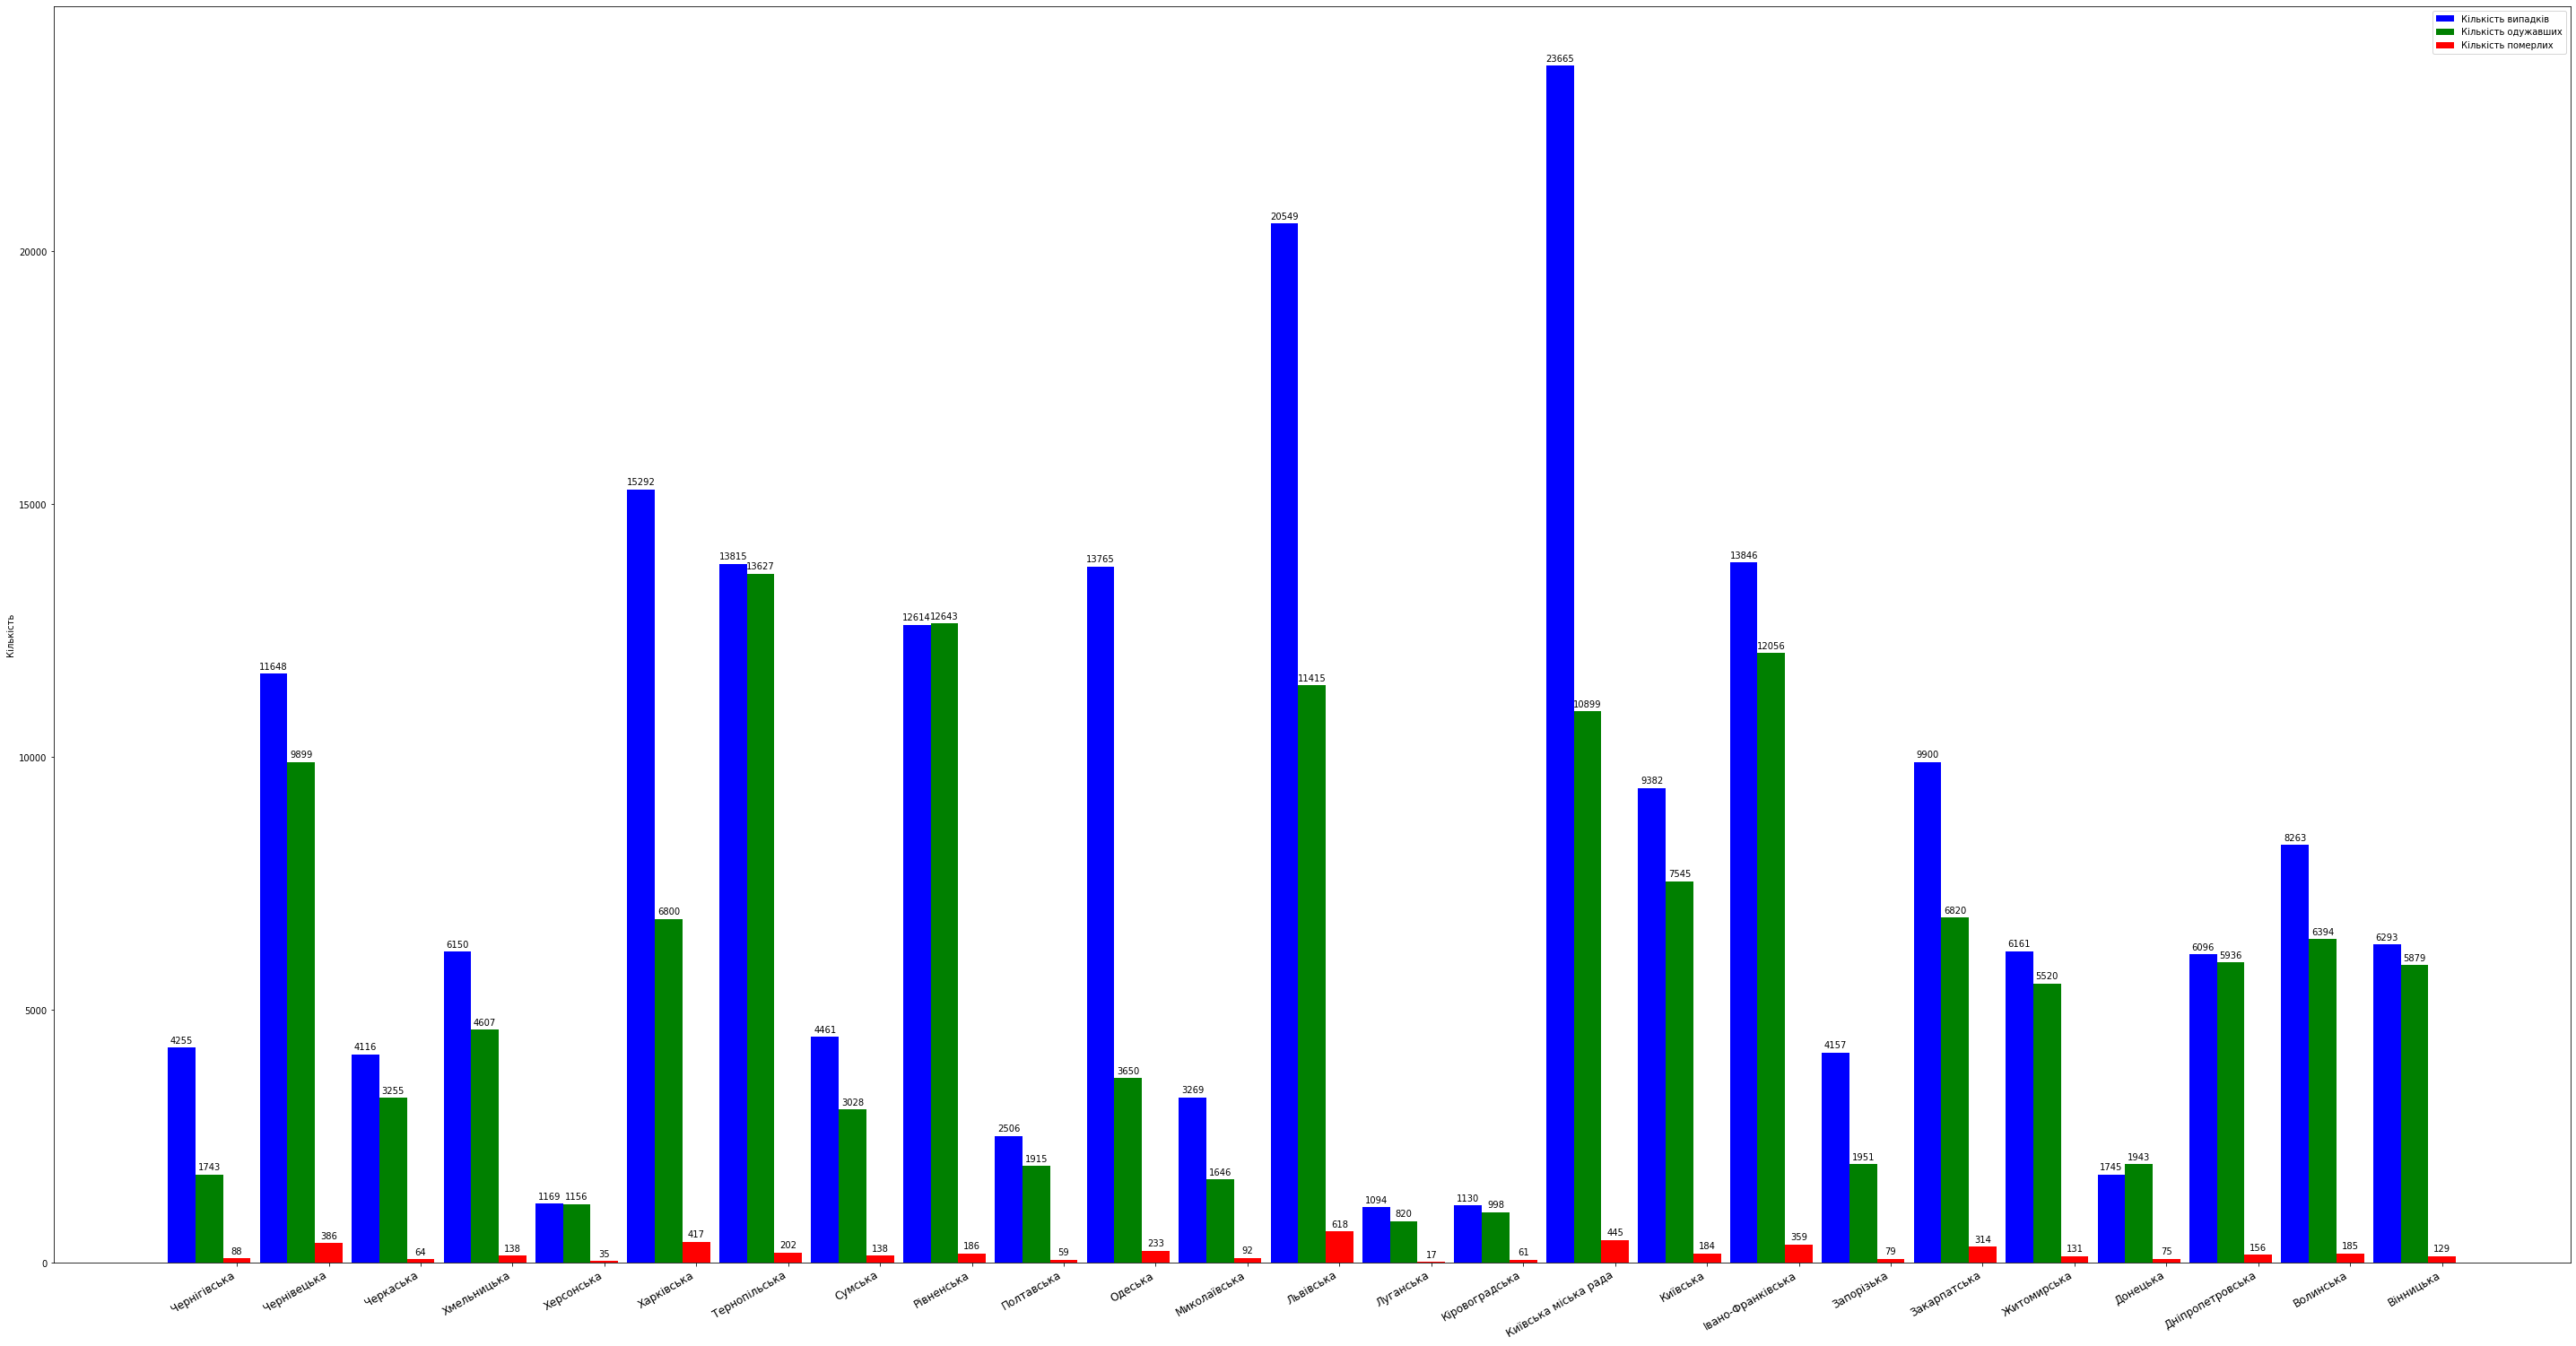

In [321]:
anal.draw_plot_stats_by_district()


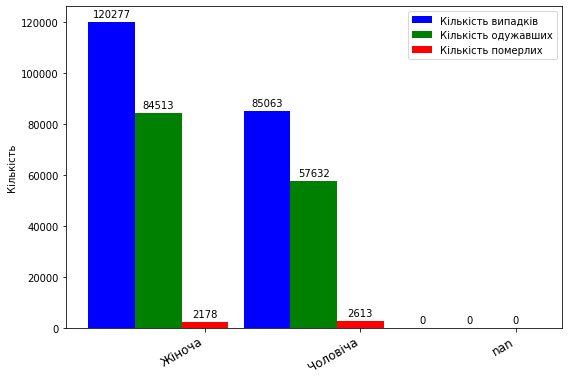

In [322]:
anal.draw_plot_stats_by_gender()


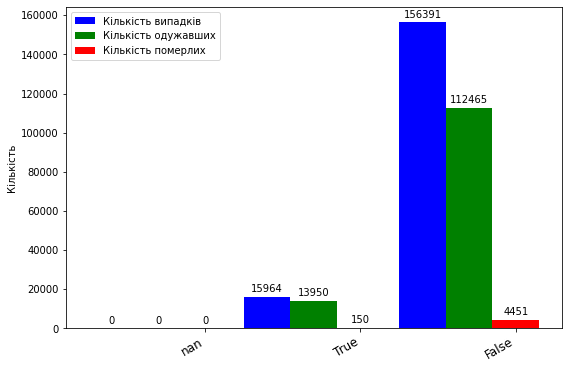

In [323]:
anal.draw_plot_stats_by_is_medic()


## Частина третя. Класифікація
На основі файлу test.csv зробити прогноз результату по кожному випадку. В тестовій вибірці залишені лише результативні випадки, тобто "Не одужав (продовжує хворіти)", "Невідомо ", "Одужання", "Пацієнт помер".

In [179]:
class PrepareForRegression:
    def __init__(self, data, is_test=False, include_result=True):
        self.data: DataFrame = data.copy(deep=True)
        self.is_test = is_test
        self.include_result = include_result

    def select_columns(self, columns):
        self.data = self.data[columns]
        self.columns = columns

    def prepare_boolean(self, col):
        self.data[col] = self.data[col].replace({np.NAN: 0, True: 1, False: 2})
        return self.data

    def prepare_sex(self):
        self.data[SEX] = self.data[SEX].replace({np.NAN: 0, 'Чоловіча': 1, 'Жіноча': 2})
        return self.data

    def prepare_nans(self, col):
        self.data[col] = self.data[col].replace({np.NAN: 0})
        return self.data

    def prepare_result(self):
        self.data[DISEASE_RESULT] = self.data[DISEASE_RESULT].replace(
            {'Не одужав (продовжує хворіти)': 0, 'Одужання': 1, 'Пацієнт помер': 2, 'Невідомо ': np.NAN}
        )
        return self.data

    def prepare_columns(self):
        self.prepare_sex()
        self.prepare_nans(AGE)
        if not self.is_test:
            self.prepare_nans(DAYS_SICKNESS)
        self.prepare_nans(DAYS_BEFORE_HOSPITALIZATION)
        if self.include_result:
            self.prepare_result()
        for col in BOOLEAN_COLUMNS.union({IS_BIG_CITY, HAS_OTHER_DISEASES}):
            self.prepare_boolean(col)
        return self.data

    def filter_rows(self, include_days_sickness=False):
        if include_days_sickness:
            self.data= self.data[(self.data[DISEASE_RESULT].isin([0,1,2])) & (self.data[DAYS_SICKNESS].isna()==False)]
        else:
            self.data= self.data[self.data[DISEASE_RESULT].isin([0,1,2])]
        #self.data= self.data[self.data[DISEASE_RESULT].isin([0,1,2])]
        return self.data

    def prepare_data(self):
        columns = { AGE, SEX, IS_BIG_CITY, HAS_OTHER_DISEASES, DAYS_BEFORE_HOSPITALIZATION}.union(BOOLEAN_COLUMNS)
        if not self.is_test:
            columns = columns.union({DAYS_SICKNESS, DISEASE_RESULT,})
        if self.include_result:
            columns = columns.union({DISEASE_RESULT,})
        self.select_columns(columns)
        self.prepare_columns()
        if self.include_result:
            self.filter_rows(include_days_sickness=not self.is_test)
        x = self.data[columns.difference({DISEASE_RESULT})].to_numpy(dtype='float64', copy=True)
        if self.include_result:
            y = self.data[DISEASE_RESULT].to_numpy(dtype='float64', copy=True)
        else:
            y = None
        return x, y


pfr = PrepareForRegression(cleaned_data, is_test=True)
x, y = pfr.prepare_data()
print(x.shape)
print(y.shape)

(150994, 19)
(150994,)


In [180]:
from imblearn.under_sampling import ClusterCentroids
trans = ClusterCentroids(random_state=0, n_jobs=-1)
X_resampled, y_resampled = trans.fit_resample(x, y)
print(X_resampled.shape)
print(y_resampled.shape)

c:\users\olexandr\.virtualenvs\dataspellenv\lib\site-packages\imblearn\under_sampling\_prototype_generation\_cluster_centroids.py:120: FutureWarning: 'n_jobs' was deprecated in 0.7 and will be removed in 0.9
  warnings.warn(


(12174, 19)
(12174,)


In [23]:
def count_unique(y):
    unique, counts = np.unique(y, return_counts=True)
    return dict(zip(unique, counts))

In [182]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 3, stratify=y_resampled)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(count_unique(y_train))
print(count_unique(y_test))

(9739, 19)
(9739,)
(2435, 19)
(2435,)
{0.0: 3246, 1.0: 3247, 2.0: 3246}
{0.0: 812, 1.0: 811, 2.0: 812}


In [312]:
from keras.optimizer_v2.adam import Adam
from tensorflow_addons.optimizers import CyclicalLearningRate
cyclical_learning_rate = CyclicalLearningRate(
    initial_learning_rate=0.0005,
    maximal_learning_rate=0.001,
    step_size=1024,
    scale_fn=lambda x: 1 / (2.0 ** (x - 1)),
    scale_mode='cycle'
)

covid_model = Sequential()
covid_model.add(Dense(64,  input_shape=(19,), activation='relu'))
covid_model.add(Dense(128,  activation='relu'))
covid_model.add(Dropout(0.1))
covid_model.add(Dense(256,  activation='relu'))
covid_model.add(Dropout(0.2))

# covid_model.add(Dropout(0.3))
# covid_model.add(Dense(64, activation='relu'))
covid_model.add(Dense(32, activation='relu'))
#covid_model.add(Dense(8, activation='relu'))
covid_model.add(Dense(3,  activation='softmax'))


covid_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=cyclical_learning_rate), metrics=['accuracy'], )
covid_model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_274 (Dense)           (None, 64)                1280      
                                                                 
 dense_275 (Dense)           (None, 128)               8320      
                                                                 
 dropout_81 (Dropout)        (None, 128)               0         
                                                                 
 dense_276 (Dense)           (None, 256)               33024     
                                                                 
 dropout_82 (Dropout)        (None, 256)               0         
                                                                 
 dense_277 (Dense)           (None, 32)                8224      
                                                                 
 dense_278 (Dense)           (None, 3)               

In [315]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = covid_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32, callbacks=[es_callback])

Epoch 1/100
305/305 [==============================] - 1s 2ms/step - loss: 0.2731 - accuracy: 0.8918 - val_loss: 0.3992 - val_accuracy: 0.8612
Epoch 2/100
305/305 [==============================] - 1s 2ms/step - loss: 0.2766 - accuracy: 0.8922 - val_loss: 0.3725 - val_accuracy: 0.8698
Epoch 3/100
305/305 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.8964 - val_loss: 0.3718 - val_accuracy: 0.8710
Epoch 4/100
305/305 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.8957 - val_loss: 0.3957 - val_accuracy: 0.8534
Epoch 5/100
305/305 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.8958 - val_loss: 0.3586 - val_accuracy: 0.8813
Epoch 6/100
305/305 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.8968 - val_loss: 0.3806 - val_accuracy: 0.8723
Epoch 7/100
305/305 [==============================] - 1s 2ms/step - loss: 0.2678 - accuracy: 0.8951 - val_loss: 0.3713 - val_accuracy: 0.8686

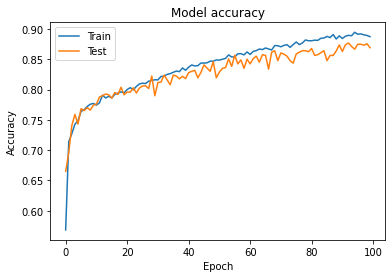

In [314]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [274]:
preds = covid_model.evaluate(x_test, y_test)

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

77/77 [==============================] - 0s 553us/step - loss: 0.3907 - accuracy: 0.8571
Loss = 0.39071521162986755
Test Accuracy = 0.8570842146873474


In [262]:
ipd = InitialPrepareData(test_data_main, is_test=True, include_result=False)
cleaned_test_data = ipd.prepare()

pfr2 = PrepareForRegression(cleaned_test_data, is_test=True, include_result=False)
x_test_main2,y_test_main2 =  pfr2.prepare_data()
x_test_main2

{'Злоякісні.новоутворення', 'Самоізоляція', 'Район', 'Дата.народження', 'Перебування.у.відділенні.інтенсивної.терапії', 'Дата.госпіталізації', 'Пацієнт.медичний.працівник', 'Місто.село', 'Область', 'Наявність.супутніх.станів', 'Стать', 'Вагітність', 'Місце.госпіталізації', 'Людський.випадок...Інд..', 'Вік..повних.років..на.момент.реєстрації.випадку', 'Імунодефіцити..в.т..ч..ВІЛ', 'Інше..зазначте', 'Дата.реєстрації.випадку', 'date', 'Захворювання.нирок', 'Класифікація.випадку', 'Назва.місця.роботи.медичного.працівника', 'Назва.закладу.який.виявив.підозру..направив.058.форму.', 'Хронічні.захворювання.легень', 'Хронічні.неврологічні.чи.нейром.язові.захворювання', 'Захворювання.печінки', 'Діабет', 'Госпіталізація', 'Штучна.вентиляція.легень', 'Серцево.судинні.захворювання..в.т..ч..гіпертензія'}
count of empty rows:  0
datetime64[ns]
datetime64[ns]


array([[2., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 2., 0., 0.],
       [2., 2., 2., ..., 1., 2., 1.],
       ...,
       [2., 2., 1., ..., 2., 2., 1.],
       [2., 0., 1., ..., 2., 0., 0.],
       [2., 0., 0., ..., 2., 0., 0.]])

In [316]:
a = covid_model.predict(x_test_main2)
res = np.argmax(a, axis=1)
kek = test_data_main.copy(deep=True)
#kek['Id'] = kek[HUMAN_CASE_INDEX].apply(str)
kek['Id'] = kek[HUMAN_CASE_INDEX]
print(kek['Id'].dtype)
kek['Category'] = res
kek['Category'] = kek['Category'].replace(
    {0:'Не одужав (продовжує хворіти)', 1:'Одужання', 2:'Пацієнт помер'}
)
res = kek[['Id', 'Category']]
res.to_csv('.\\prediction21.csv', index=False)

object
